# Telecom Stocks Analysis

## Project Overview
This project analyses the stock performance of three major telecom companies: AT&T(T), T-Mobile (TMUS), and Verizon (VZ) over a one-year period. The analysis includes trend analysis, volatility assessment, correlation studies, and performance comparisons to provide insights for potential investors.

## Data Source
The data used in this analysis is sourced from Python with the yfinance library.
This library allows you to easily download historical market data from Yahoo
Finance, which covers NASDAQ listed companies.
This data contains daily trading information including opening, closing, high, and low prices, as well as trading volume for each

By: Yara , Hunter, Adolphus, Sanjana, Kowsar  company.


In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time
from scipy.stats import linregress
import yfinance as yf
import seaborn as sns
import mplfinance as mpf
from datetime import datetime, timedelta 

In [46]:
# Define the ticker symbols
tickers = ['T', 'TMUS', 'VZ']

# Set the start and end dates
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=1)

# Create an empty dictionary to store data
data = {}

# Fetch the data for each ticker
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data

# Convert the dictionary to a DataFrame
df = pd.concat(data, axis=1)


# save the data to a CSV file
df.to_csv('cell_phone_companies_trading_data.csv')

# Display the dataFrame
df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


T                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2023-08-09  14.170000  14.350000  14.150000  14.270000  13.355253  33951700   
2023-08-10  14.290000  14.350000  14.170000  14.170000  13.261663  33556400   
2023-08-11  14.150000  14.400000  14.120000  14.370000  13.448842  31213900   
2023-08-14  14.310000  14.370000  14.180000  14.260000  13.345895  26901400   
2023-08-15  14.200000  14.210000  14.100000  14.140000  13.233586  26393600   
...               ...        ...        ...        ...        ...       ...   
2024-08-02  19.639999  19.990000  19.190001  19.370001  19.370001  45240100   
2024-08-05  18.799999  19.120001  18.639999  18.910000  18.910000  50898400   
2024-08-06  18.889999  19.299999  18.860001  19.190001  19.190001  33776000   
2024-08-07  19.200001  19.520000  19.100000  19.250000  19.250000  30036700   
2024-08-08  19.260000  19.480000  19.209999  19.400000  19.400000  24923800   

                  TMUS                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2023-08-09  136.229996  138.360001  136.080002  137.710007  136.047348   
2023-08-10  138.649994  139.440002  137.580002  137.729996  136.067093   
2023-08-11  137.080002  138.570007  137.020004  138.339996  136.669739   
2023-08-14  138.949997  139.889999  138.160004  139.500000  137.815735   
2023-08-15  138.710007  139.600006  138.179993  138.580002  136.906830   
...                ...         ...         ...         ...         ...   
2024-08-02  189.000000  193.770004  188.300003  188.759995  188.759995   
2024-08-05  192.369995  193.479996  185.389999  186.869995  186.869995   
2024-08-06  186.949997  192.649994  186.520004  189.860001  189.860001   
2024-08-07  189.860001  193.929993  189.860001  190.589996  190.589996   
2024-08-08  190.440002  193.839996  190.000000  193.610001  193.610001   

                            VZ                                              \
             Volume       Open       High        Low      Close  Adj Close   
Date                                                                         
2023-08-09  4092900  32.509998  32.830002  32.340000  32.709999  30.494339   
2023-08-10  2492800  32.849998  33.320000  32.820000  33.020000  30.783340   
2023-08-11  2886800  32.959999  33.419998  32.950001  33.360001  31.100313   
2023-08-14  3117800  33.189999  33.590000  33.139999  33.560001  31.286762   
2023-08-15  2664500  33.349998  33.509998  33.209999  33.259998  31.007080   
...             ...        ...        ...        ...        ...        ...   
2024-08-02  7922800  41.200001  41.939999  40.410000  40.970001  40.970001   
2024-08-05  6523000  40.000000  40.270000  39.639999  39.799999  39.799999   
2024-08-06  4492100  39.970001  40.480000  39.759998  40.259998  40.259998   
2024-08-07  4685900  40.360001  40.720001  40.200001  40.279999  40.279999   
2024-08-08  5437100  40.279999  40.790001  40.250000  40.520000  40.520000   

                      
              Volume  
Date                  
2023-08-09  20798500  
2023-08-10  19031600  
2023-08-11  15262000  
2023-08-14  17934000  
2023-08-15  15528600  
...              ...  
2024-08-02  26124900  
2024-08-05  26855000  
2024-08-06  18104200  
2024-08-07  12176300  
2024-08-08  13039300  

[252 rows x 18 columns]

In [47]:
# number of rows and columns
df.shape

(252, 18)

In [48]:
df.info

<bound method DataFrame.info of                     T                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2023-08-09  14.170000  14.350000  14.150000  14.270000  13.355253  33951700   
2023-08-10  14.290000  14.350000  14.170000  14.170000  13.261663  33556400   
2023-08-11  14.150000  14.400000  14.120000  14.370000  13.448842  31213900   
2023-08-14  14.310000  14.370000  14.180000  14.260000  13.345895  26901400   
2023-08-15  14.200000  14.210000  14.100000  14.140000  13.233586  26393600   
...               ...        ...        ...        ...        ...       ...   
2024-08-02  19.639999  19.990000  19.190001  19.370001  19.370001  45240100   
2024-08-05  18.799999  19.120001  18.639999  18.910000  18.910000  50898400   
2024-08-06  18.889999  19.299999  18.860001  19.190001  19.190001  33776000   
2024-08-07  19.20000

In [49]:
# Load the data
df = pd.read_csv("cell_phone_companies_trading_data.csv", header=[0,1], index_col=0)
df.index = pd.to_datetime(df.index)

# Separate data for each company
companies = ['T', 'TMUS', 'VZ']
data = {company: df[company].copy() for company in companies}

# display data
data

{'T':                  Open       High        Low      Close  Adj Close    Volume
 Date                                                                       
 2023-08-09  14.170000  14.350000  14.150000  14.270000  13.355253  33951700
 2023-08-10  14.290000  14.350000  14.170000  14.170000  13.261663  33556400
 2023-08-11  14.150000  14.400000  14.120000  14.370000  13.448842  31213900
 2023-08-14  14.310000  14.370000  14.180000  14.260000  13.345895  26901400
 2023-08-15  14.200000  14.210000  14.100000  14.140000  13.233586  26393600
 ...               ...        ...        ...        ...        ...       ...
 2024-08-02  19.639999  19.990000  19.190001  19.370001  19.370001  45240100
 2024-08-05  18.799999  19.120001  18.639999  18.910000  18.910000  50898400
 2024-08-06  18.889999  19.299999  18.860001  19.190001  19.190001  33776000
 2024-08-07  19.200001  19.520000  19.100000  19.250000  19.250000  30036700
 2024-08-08  19.260000  19.480000  19.209999  19.400000  19.400000  249

# Trend Analysis
   - A line plot showing the closing prices of all three stocks over the year.
   - This visualizes the overall price trends and allows for easy comparison between the companies



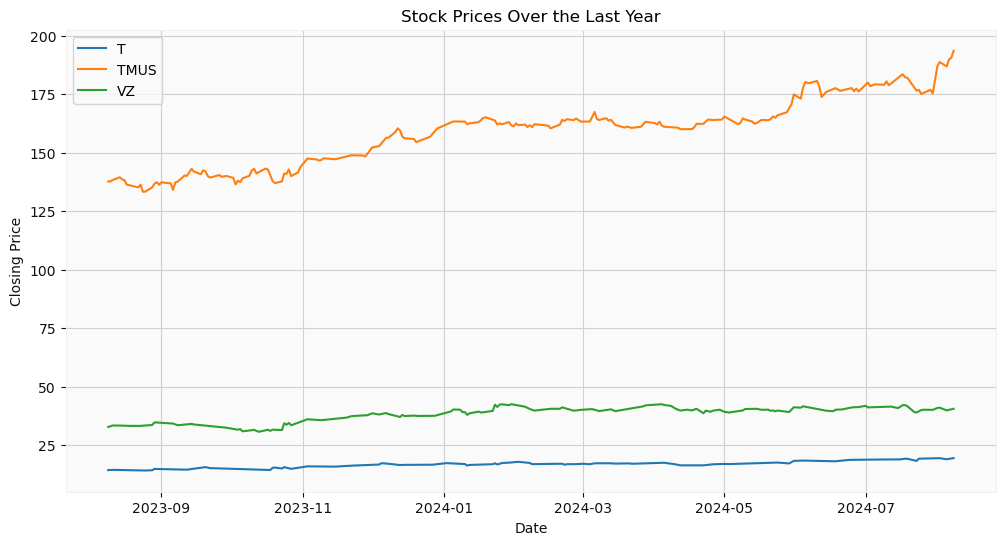

In [50]:
# Trend Analysis
plt.figure(figsize=(12, 6))
for company in companies:
    plt.plot(data[company]['Close'], label=company)
plt.title('Stock Prices Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# save to file
plt.savefig('stock_prices.png')

plt.show()




# Conclusion: Compared to VZ and T, TMUS has a better closing price and faster growth rate. VZ and T appear to have a constant growth rate 

# Moving Averages
   - Calculation and visualization of 20-day moving averages for each stock. It takes a certain day and finds a tren  over 20 days.             (takes 10 days before the day and 10 days after and calculates the average)
   - Helps in identifying short-term trends and smoothing out price fluctuations. (if there are any unusual jumpsn the da a it t will show



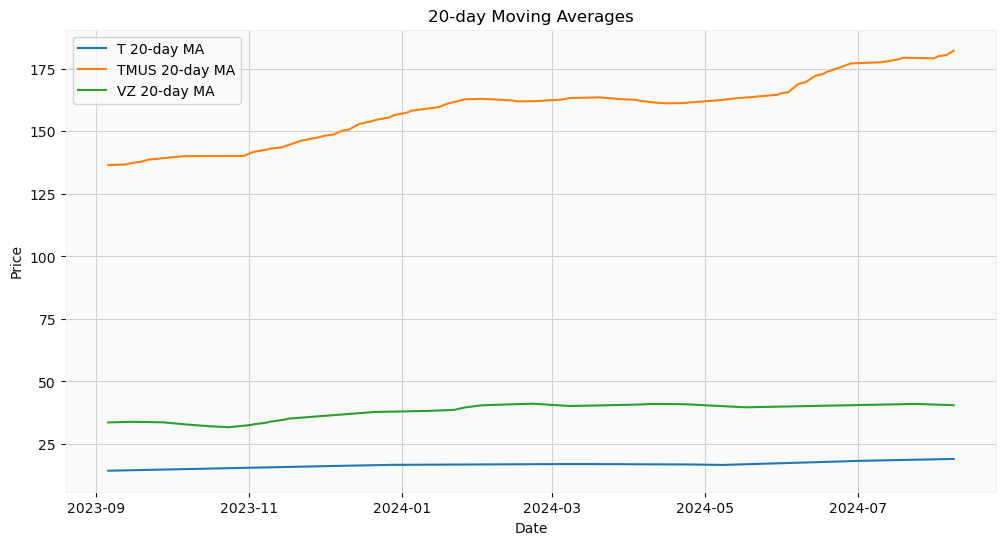

In [51]:
# Moving Averages plot
window = 20
plt.figure(figsize=(12, 6))
for company in companies:
    ma = data[company]['Close'].rolling(window=window).mean()
    plt.plot(ma, label=f"{company} {window}-day MA")
plt.title(f'{window}-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# save to file
plt.savefig('stock_price_Avg.png')

plt.show()

# Conclusion: Even with 20 days in consideration, it's clear that TMUS has a higher closing price compared to the other companies and we can see that all stocks are growing.

# Daily Returns
   - Calculation of daily returns for each stock. (The average change from one day to another. The percentage value is between 0-1
   - Used in subsequent analyses for volatility and correlation.


In [52]:
# Show Daily Returns
for company in companies:
    data[company].loc[:, 'Daily_Return'] = data[company]['Close'].pct_change()

# print data with the new added column daily return 
print(data)

{'T':                  Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2023-08-09  14.170000  14.350000  14.150000  14.270000  13.355253  33951700   
2023-08-10  14.290000  14.350000  14.170000  14.170000  13.261663  33556400   
2023-08-11  14.150000  14.400000  14.120000  14.370000  13.448842  31213900   
2023-08-14  14.310000  14.370000  14.180000  14.260000  13.345895  26901400   
2023-08-15  14.200000  14.210000  14.100000  14.140000  13.233586  26393600   
...               ...        ...        ...        ...        ...       ...   
2024-08-02  19.639999  19.990000  19.190001  19.370001  19.370001  45240100   
2024-08-05  18.799999  19.120001  18.639999  18.910000  18.910000  50898400   
2024-08-06  18.889999  19.299999  18.860001  19.190001  19.190001  33776000   
2024-08-07  19.200001  19.520000  19.100000  19.250000  19.250000  30036700   
2024-08-08  19.260000  19.480000  19.209999  1

# Volatility Analysis**
   - Computation of annualized volatility for each stock.
   - Visualized using a bar plot to compare the relative risk of each stock
   - The change in stock. If the change gap is huge, it means that the stock is risky and not stable (this can be good for high-risk clients    over a short period of time. If the Change is small, it’s more stable less risky stock)


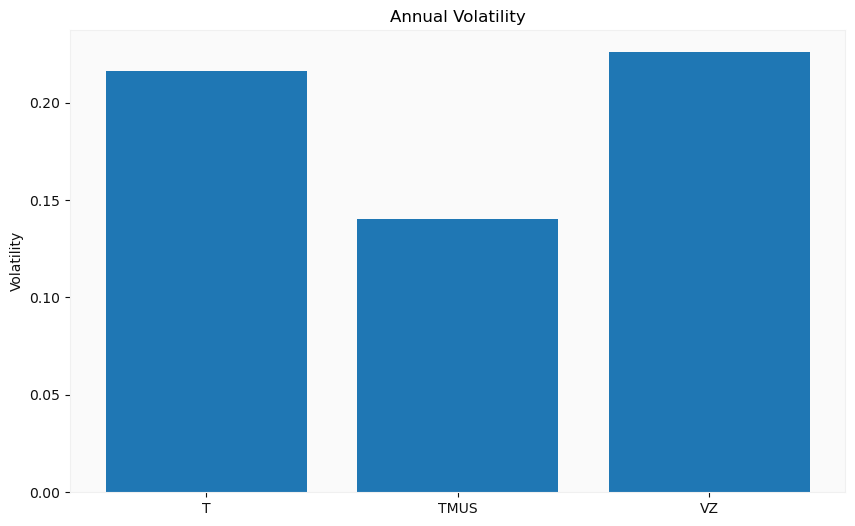

In [53]:
# Volatility
volatility = {company: data[company]['Daily_Return'].std() * np.sqrt(252) for company in companies}

# Plot Volatility
plt.figure(figsize=(10, 6))
plt.bar(volatility.keys(), volatility.values())
plt.title('Annual Volatility')
plt.ylabel('Volatility')
plt.grid(False)

# save to file
plt.savefig('Volatility.png')

plt.show()


# Conclusion: TMUS is the least volatile stock, therefore the least risky to invest in. While VZ is the most Volatile, therefore higher risk, greater shift in stock prices.

# Correlation Analysis
   - Calculation of correlation between the daily returns of the three stocks. (to measure the size of the stock with the other                 companies)
   - Visualized using a heatmap to show the strength and direction of relationships between the stocks. (Same colour means they are similar     and 100% matching stocks)


In [54]:
# Show Correlation Analysis
corr_returns = pd.DataFrame({company: data[company]['Daily_Return'] for company in companies})
correlation = corr_returns.corr()

corr_returns

,T,TMUS,VZ
Date,,,
2023-08-09,NaN,NaN,NaN
2023-08-10,-0.007008,0.000145,0.009477
2023-08-11,0.014114,0.004429,0.010297
2023-08-14,-0.007655,0.008385,0.005995
2023-08-15,-0.008415,-0.006595,-0.008939
...,...,...,...
2024-08-02,-0.005136,0.009034,0.002938
2024-08-05,-0.023748,-0.010013,-0.028558
2024-08-06,0.014807,0.016000,0.011558


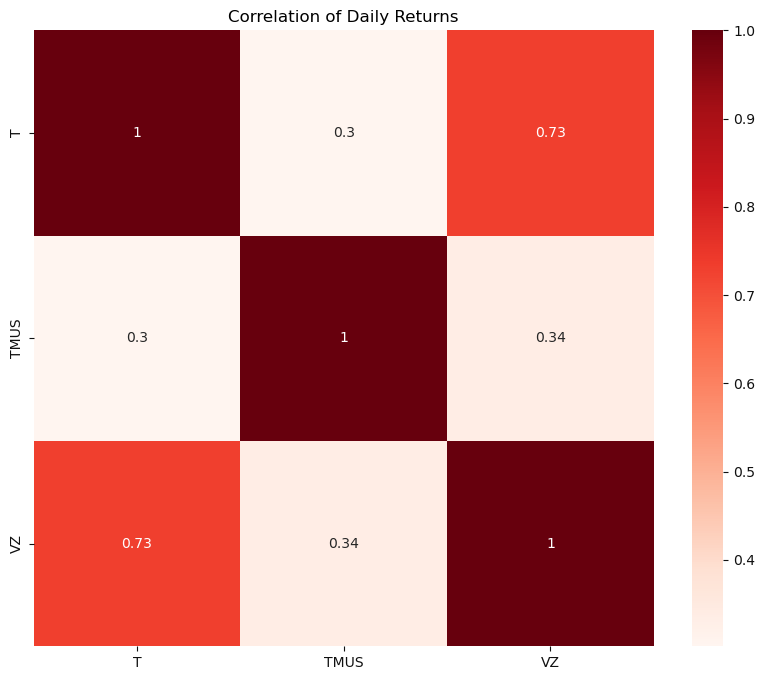

In [55]:
# plot heatmap correlation of daily returns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='Reds')
plt.title('Correlation of Daily Returns')
plt.grid(False)

# save to file
plt.savefig('correlation.png')

plt.show()

# Conclusion: 
  - T - TMUS has a weak positive correlation
  - T - VZ strong positive correlation
  - TMUS - VZ weak positive correlation

# Cumulative Returns
   - Calculation and visualization of cumulative returns for each stock. (Return is between 0-1 so we need to add 1 to    the return before calculating the cum to remove the decimal 
   - Provides insight into overall performance over the entire perdio.



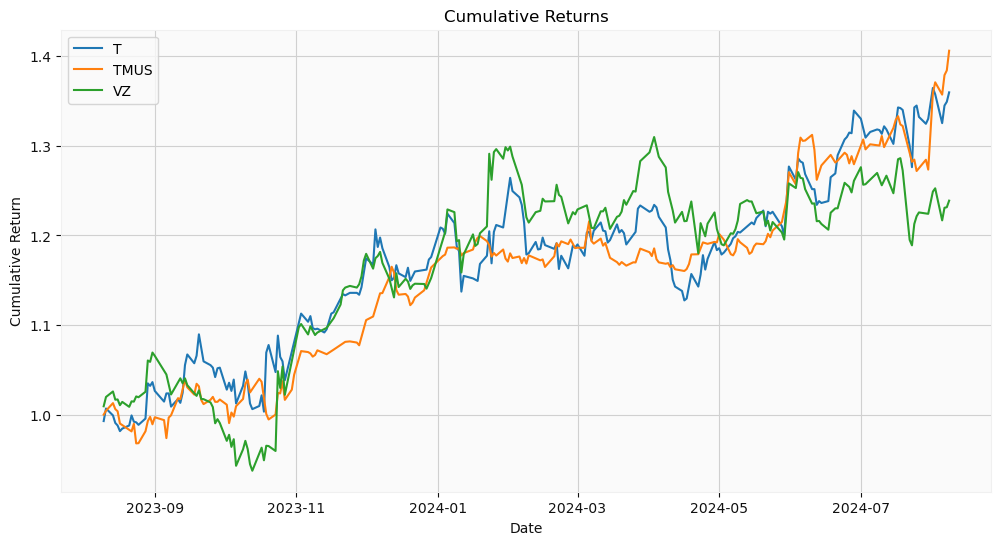

In [56]:
# calculate and plot Cumulative Returns
cum_returns = (1 + corr_returns).cumprod()

plt.figure(figsize=(12, 6))
for company in companies:
    plt.plot(cum_returns[company], label=company)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()

# save to file
plt.savefig('cum_returns.png')

plt.show()

# Conclusion: With T and VZ stocks faster and larger movments Cum returns which proves that they have higher Volatility 

# Candlestick Charts
   - Creation of candlestick charts for each company. (This is one of the main Charts used to analyse stock market        data)
   - Offers a detailed view of daily price movements, including opening, closing, high, and low prices


In [57]:
# show plot_data for candelstick plot
for company in companies:
    # Prepare data for mplfinance
    plot_data = data[company].copy()

plot_data

,Open,High,Low,Close,Adj Close,Volume,Daily_Return
Date,,,,,,,
2023-08-09,32.509998,32.830002,32.340000,32.709999,30.494339,20798500,NaN
2023-08-10,32.849998,33.320000,32.820000,33.020000,30.783340,19031600,0.009477
2023-08-11,32.959999,33.419998,32.950001,33.360001,31.100313,15262000,0.010297
2023-08-14,33.189999,33.590000,33.139999,33.560001,31.286762,17934000,0.005995
2023-08-15,33.349998,33.509998,33.209999,33.259998,31.007080,15528600,-0.008939
...,...,...,...,...,...,...,...
2024-08-02,41.200001,41.939999,40.410000,40.970001,40.970001,26124900,0.002938
2024-08-05,40.000000,40.270000,39.639999,39.799999,39.799999,26855000,-0.028558
2024-08-06,39.970001,40.480000,39.759998,40.259998,40.259998,18104200,0.011558


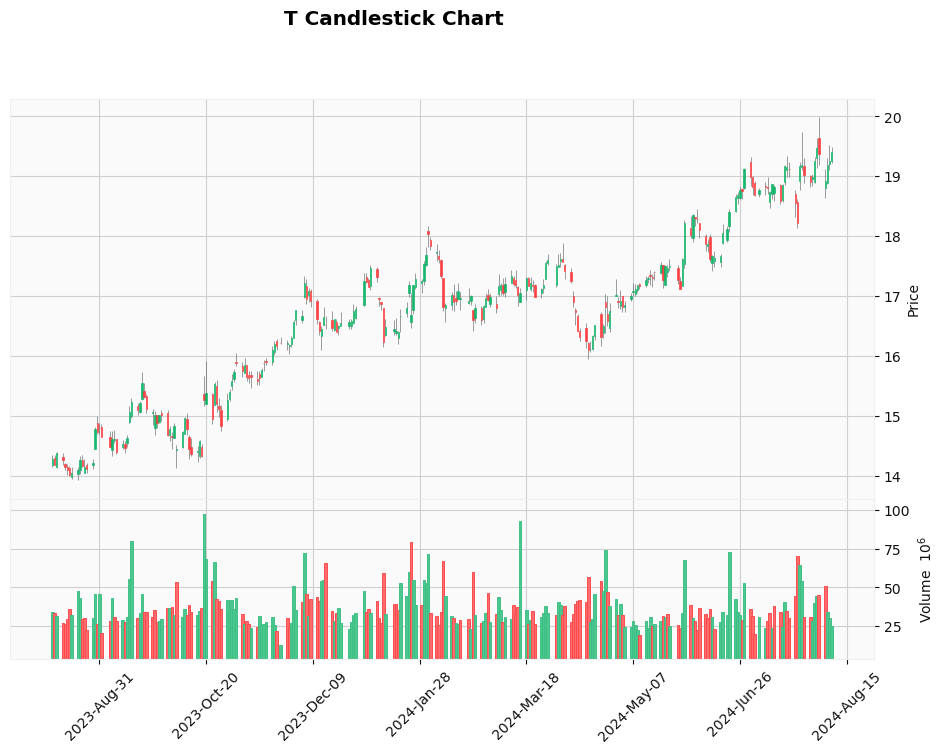

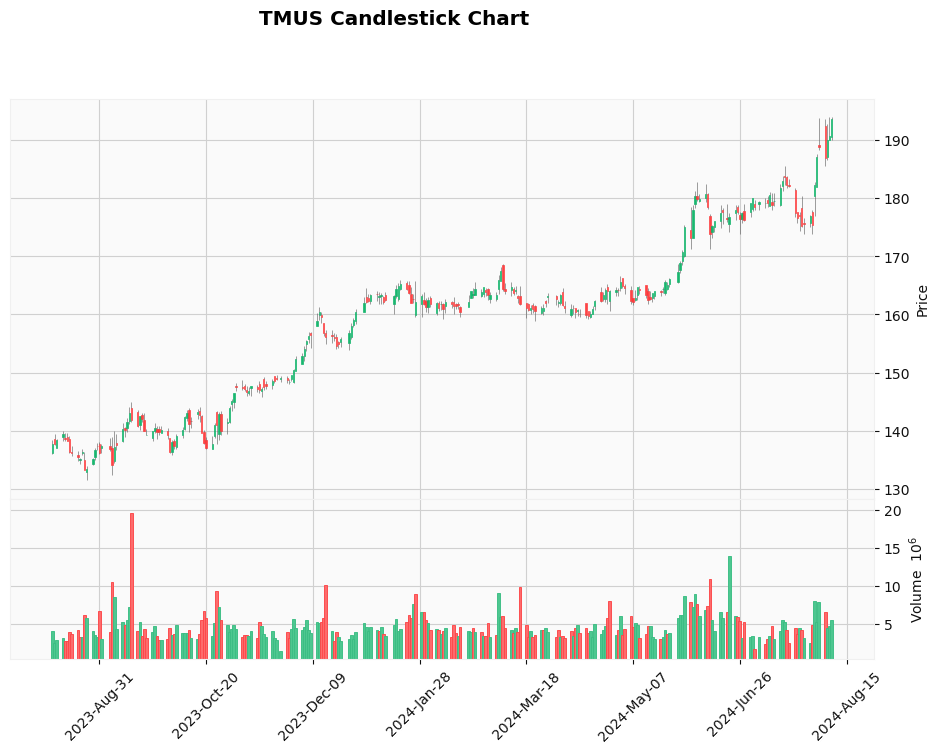

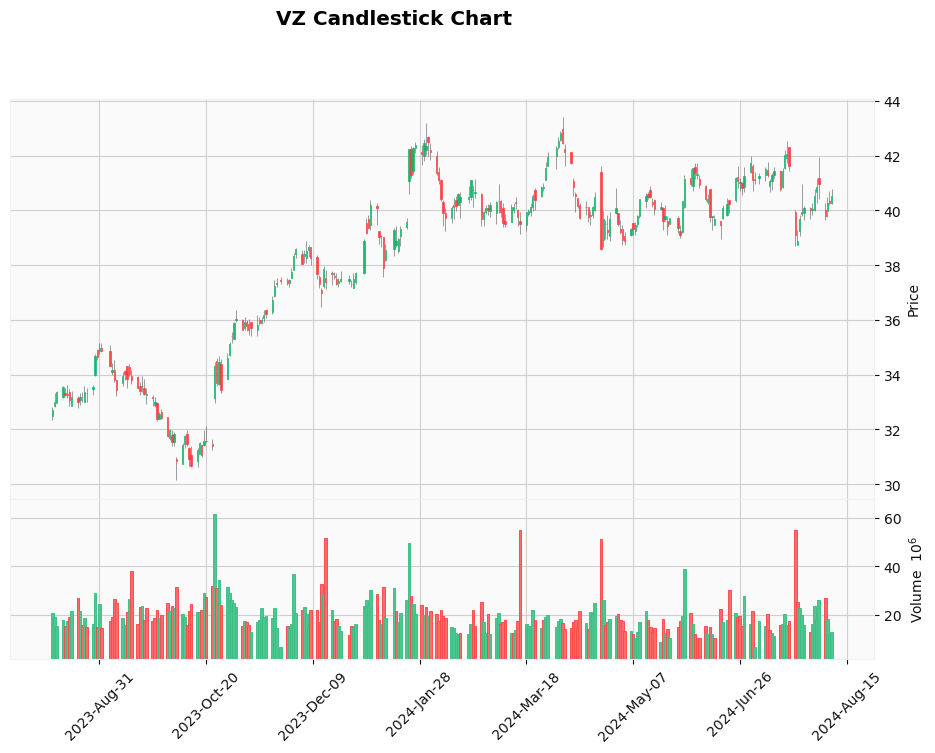

In [58]:
# Candlestick plots

for company in companies:
    # Prepare data for mplfinance
    plot_data = data[company].copy()
    
    # Check if columns have multiple levels
    if isinstance(plot_data.columns, pd.MultiIndex):
        plot_data.columns = plot_data.columns.droplevel()  # Remove multi-level column index
    
    # Ensure all required columns are present
    required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    if not all(col in plot_data.columns for col in required_columns):
        print(f"Skipping candlestick plot for {company} due to missing required columns")
        continue
 
    
    plot_data = plot_data[required_columns]

    
    # Create candlestick plot
    mpf.plot(plot_data, type='candle', volume=True, title=f'{company} Candlestick Chart',
             style='yahoo', figsize=(12, 8), show_nontrading=True, savefig=f'{company}_candlestick_plot.png')

    mpf.plot(plot_data, type='candle', volume=True, title=f'{company} Candlestick Chart',
             style='yahoo', figsize=(12, 8), show_nontrading=True)

    
    

# Conclusion: 
# T-Mobile
-	Trend: The chart for T-Mobile shows a strong uptrend with consistent higher highs and higher lows. The price action indicates a bullish      momentum, particularly with the recent spike above the $190 level.
-	Analysis: This suggests strong buying pressure, and the stock appears to be in a strong uptrend. If the trend continues, T-Mobile coul     d be a favorable investment# .
Verizon
-	Trend: Verizon’s chart shows a more neutral to slightly bullish trend. The stock experienced a significant drop around December 2023     but has since recovered. However, the price action shows a lot of sideways movement with no clear, strong trend.
-	Analysis: Verizon’s stock seems to be consolidating, with some volatility but no decisive trend. This might indicate caution, as         the stock isn’t showing strong momentum in either direct# ion.
AT&T
-	Trend: The chart for AT&T is showing a steady uptrend, similar to T-Mobile, but at a slower pace. The stock has been making highe     r lows and higher highs, particularly since early 2024.
-	Analysis: This suggests a positive outlook for AT&T, though the upward momentum is not as strong as T-Mobile’s. It could still be     a good investment if the trend con# tinues.
Conclusion
T-Mobile appears to be the strongest performer with a clear bullish trend.
AT&T is also trending upwards, though at a more gradual pace.
Verizon shows a neutral pattern with potential caution due to the lack of a clear trend.
Based on these trends, T-Mobile might be the best option for investment if you’re looking for a stock with strong upward momentum. AT&T could also be considered, while Verizon may require more observation for a clearer direction.


# Trading Volume Analysis
   - Visualization of trading volume over time for each stock.
   - Helps in understanding liquidity and investor interest



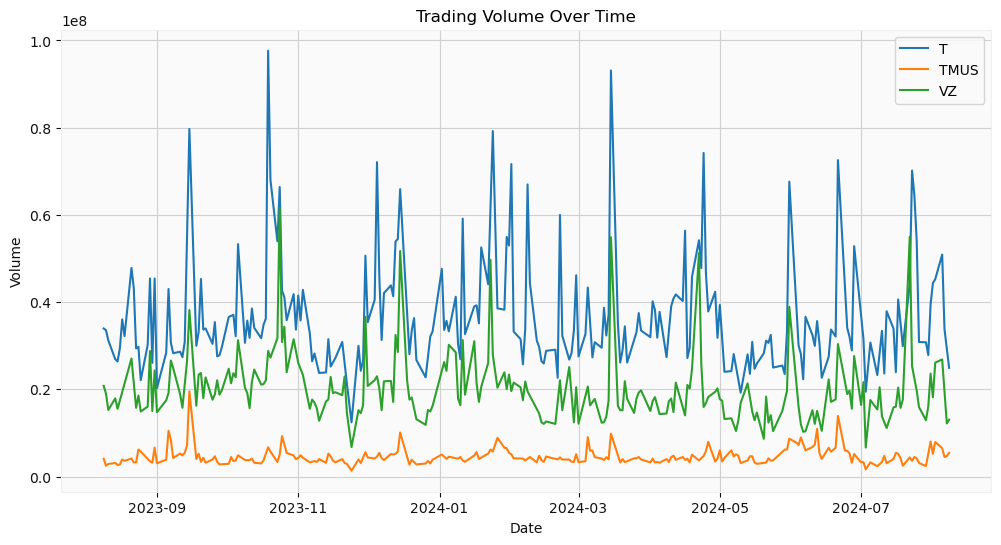

In [59]:
# plot Trading Volume Analysis
plt.figure(figsize=(12, 6))
for company in companies:
    plt.plot(data[company]['Volume'], label=company)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

# save to file
plt.savefig('Volume.png')

plt.show()

# Conclusion: 
-	AT&T (T): High trading volume coupled with an uptrend might indicate strong market confidence in AT&T, making it a robust option for         investment.
-	Verizon (VZ): With moderate trading volume and a neutral price trend, Verizon might be considered less attractive unless there’s a clear     price breakout.
-	T-Mobile (TMUS): While T-Mobile has shown a strong price uptrend, its lower trading volumecould suggest that this movement is driven b     y fewer, possibly more strategic, investors.
The decision to invest could depend on your risk tolerance and investment strategy. T-Mobile offers strong price performance but with lower volume, suggesting it might be a good pick for those looking for growth with potentially less volatility. AT&T’s combination of high trading volume and upward price trend suggests it might be a safer, more liquid investment. Verizon, with its moderate volume and neutral price movement, might be best approached with caution, especially until a clearer trend develops.


# Summary Statistics
   - Compilation of key statistics including start price, end price, percent change, average      daily return, and       volatility.
   - Provides a quick overview of each stock's performance.


In [60]:
# Summary Statistics
summary = pd.DataFrame({
    company: {
        'Start Price': data[company]['Close'].iloc[0],
        'End Price': data[company]['Close'].iloc[-1],
        'Percent_Change': (data[company]['Close'].iloc[-1] / data[company]['Close'].iloc[0] - 1) * 100,
        'Average Daily Return': data[company]['Daily_Return'].mean() * 100,
        'Volatility': volatility[company] * 100,
    } for company in companies
})

print(summary)

                              T        TMUS         VZ
Start Price           14.270000  137.710007  32.709999
End Price             19.400000  193.610001  40.520000
Percent_Change        35.949537   40.592543  23.876495
Average Daily Return   0.131619    0.139722   0.095331
Volatility            21.635357   14.053048  22.589798


In [61]:
# Conclusion and Recommendations
print("\nConclusion and Recommendations:")
best_performer = summary.loc['Percent_Change'].idxmax()
lowest_volatility = summary.loc['Volatility'].idxmin()

print(f"Based on the analysis:")
print(f"1. {best_performer} has shown the highest price appreciation over the past year.")
print(f"2. {lowest_volatility} has the lowest volatility, suggesting it might be the most stable investment.")
print("3. Consider the correlation between stocks for diversification purposes.")
print("4. Monitor trading volumes for liquidity concerns.")
print("\nRecommendation: A balanced portfolio might include a mix of these stocks, with emphasis on")
print(f"{best_performer} for growth potential and {lowest_volatility} for stability. However, this")
print("should be considered in the context of the investor's risk tolerance and overall investment strategy.")


Conclusion and Recommendations:
Based on the analysis:
1. TMUS has shown the highest price appreciation over the past year.
2. TMUS has the lowest volatility, suggesting it might be the most stable investment.
3. Consider the correlation between stocks for diversification purposes.
4. Monitor trading volumes for liquidity concerns.

Recommendation: A balanced portfolio might include a mix of these stocks, with emphasis on
TMUS for growth potential and TMUS for stability. However, this
should be considered in the context of the investor's risk tolerance and overall investment strategy.


#  Key Findings: 

1. Best Performer: The analysis identifies the stock with the highest price appreciation over the year.
2. Lowest Volatility: The stock with the lowest volatility is highlighted, indicating potentially lower risk.
3. Correlation Insights: The correlation analysis reveals how the stocks move in relation to each other,
   which is crucial for portfolio diversification.
4. Volume Trends: The trading volume analysis provides insights into the liquidity of each sto.

## Recommendations

Based on the analysis, the script provides a basic recommendation for portfolio composition, considering both growth potential and stability. However, it emphasizes that these recommendations should be considered in the context of an investor's risk tolerance and overall investment strategy.


# Dividend and P/E ratio
  - Retrieves the dividends per share, quarterly financials, and general information for the stock.
  - Calculates the dividend yield by summing up the dividends per share and dividing by the last closing price of the stoc.  - Cto calculate the EPS (Earnings Per Share) by summing the net income for the last four quarters and subtracting prefer    red dividen      ds, then dividing by the number of shares outstandn  - g.

Finally, it calculates the P/E ratio by dividing the last closing price by the EPS if EPS is not None.


In [62]:
# Calculate the dividend and P?E ratio
for ticker in tickers:
    # Fetch the ticker data
    ticker_data = yf.Ticker(ticker)
    # Get the necessary data for dividend yield and P/E ratio calculation
    dividends_per_share = ticker_data.dividends
    quarterly_financials = ticker_data.quarterly_financials
    info = ticker_data.info
    last_price = df[ticker]['Close'].iloc[-1]
    # Calculate dividend yield
    dividend_yield = dividends_per_share.sum() / last_price if not dividends_per_share.empty else None
    # Calculate EPS
    try:
        # Retrieve net income for the last four quarters
        if not quarterly_financials.empty and 'Net Income' in quarterly_financials.index:
            # Sum the net income of the last four quarters
            last_four_quarters = quarterly_financials.loc['Net Income'].head(4)  # Latest four quarters
            total_net_income = last_four_quarters.sum()
        else:
            total_net_income = None
        preferred_dividends = info.get('preferredDividends', 0)  # Default to 0 if not available
        shares_outstanding = info.get('sharesOutstanding', None)
        # Calculate EPS
        if total_net_income is not None and shares_outstanding is not None and shares_outstanding > 0:
            eps = (total_net_income - preferred_dividends) / shares_outstanding
        else:
            eps = None
        # Calculate P/E Ratio
        pe_ratio = last_price / eps if eps else None
    except Exception as e:
        print(f"Error calculating P/E ratio for {ticker}: {e}")
        eps = None
        pe_ratio = None
    # Print the results
    print(f"Stock: {ticker}")
    print(f"Dividend Yield: {dividend_yield}")
    print(f"Earnings Per Share (TTM): {eps}")
    print(f"P/E Ratio: {pe_ratio}")
    print('\n')

Stock: T
Dividend Yield: 2.5863015972472043
Earnings Per Share (TTM): 1.7746965234078635
P/E Ratio: 10.931446229058587


Stock: TMUS
Dividend Yield: 0.0310417849339063
Earnings Per Share (TTM): 8.1034982950411
P/E Ratio: 23.892150471461242


Stock: VZ
Dividend Yield: 1.6048170598561955
Earnings Per Share (TTM): 2.672988763055512
P/E Ratio: 15.159061279197067




# Conclusion 
-	AT&T (T): Highest dividend yield (2.61%) and low P/E ratio (10.85) suggest it’s a good pick for income and value investors.
-	T-Mobile (TMUS): Strong EPS (8.10) but low dividend yield (0.03%) and high P/E ratio (23.52) make it best for growth-focused investors.
-	Verizon (VZ): Balanced option with moderate dividend yield (1.61%), solid EPS (2.67), and a reasonable P/E ratio (15.07), suitable fo    r those seeking stability.
